In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

In [2]:
total_data=pd.read_csv("../data/processed/final_data.csv")
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [3]:
duplicate_count = total_data.duplicated().sum()
duplicate_count

0

In [4]:
total_data = total_data.drop_duplicates()
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [5]:
violadores=total_data[total_data['crm_cd_desc'].isin([50, 3])]

In [6]:
len(violadores)

1779

In [7]:
violadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1779 entries, 4 to 320414
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_occ      1779 non-null   object 
 1   time_occ      1779 non-null   int64  
 2   area_name     1779 non-null   int64  
 3   crm_cd_desc   1779 non-null   int64  
 4   vict_age      1779 non-null   int64  
 5   vict_sex      1779 non-null   int64  
 6   vict_descent  1779 non-null   int64  
 7   premis_desc   1779 non-null   int64  
 8   weapon_desc   1779 non-null   int64  
 9   status_desc   1779 non-null   int64  
 10  location      1779 non-null   int64  
 11  lat           1779 non-null   float64
 12  lon           1779 non-null   float64
 13  weekday       1779 non-null   int64  
 14  month         1779 non-null   int64  
 15  mocodes_desc  1779 non-null   int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 236.3+ KB


In [8]:
violadores['date_occ'] = pd.to_datetime(violadores['date_occ'], errors='coerce')
violadores['date_occ'] = violadores['date_occ'].astype('int64')

C:\Users\luisf\AppData\Local\Temp\ipykernel_18036\981732575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violadores['date_occ'] = pd.to_datetime(violadores['date_occ'], errors='coerce')
C:\Users\luisf\AppData\Local\Temp\ipykernel_18036\981732575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violadores['date_occ'] = violadores['date_occ'].astype('int64')


In [9]:
violadores=violadores.drop('crm_cd_desc',axis=1)

In [10]:
violadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1779 entries, 4 to 320414
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_occ      1779 non-null   int64  
 1   time_occ      1779 non-null   int64  
 2   area_name     1779 non-null   int64  
 3   vict_age      1779 non-null   int64  
 4   vict_sex      1779 non-null   int64  
 5   vict_descent  1779 non-null   int64  
 6   premis_desc   1779 non-null   int64  
 7   weapon_desc   1779 non-null   int64  
 8   status_desc   1779 non-null   int64  
 9   location      1779 non-null   int64  
 10  lat           1779 non-null   float64
 11  lon           1779 non-null   float64
 12  weekday       1779 non-null   int64  
 13  month         1779 non-null   int64  
 14  mocodes_desc  1779 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 222.4 KB


In [11]:
duplicate_count = violadores.duplicated().sum()
duplicate_count

0

In [12]:
violadores.to_csv("../data/processed/rappist_data.csv")

c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

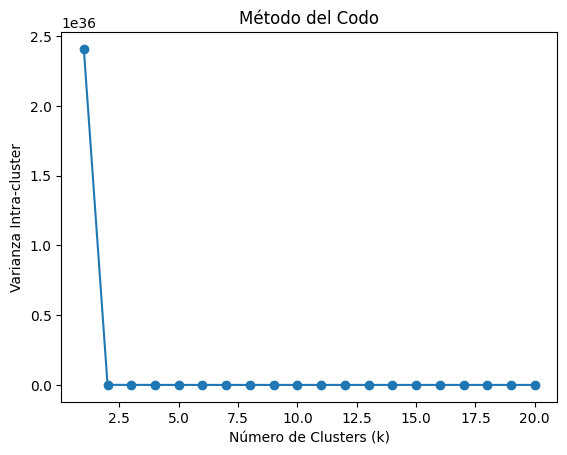

In [13]:
# Lista para almacenar la varianza intra-cluster para diferentes valores de k
inertia_values = []

# Prueba diferentes valores de k
for k in range(1, 1000, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(violadores)
    inertia_values.append(kmeans.inertia_)

# Dibuja el gráfico del método del codo
plt.plot(range(1, 21), inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Varianza Intra-cluster')
plt.show()

c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

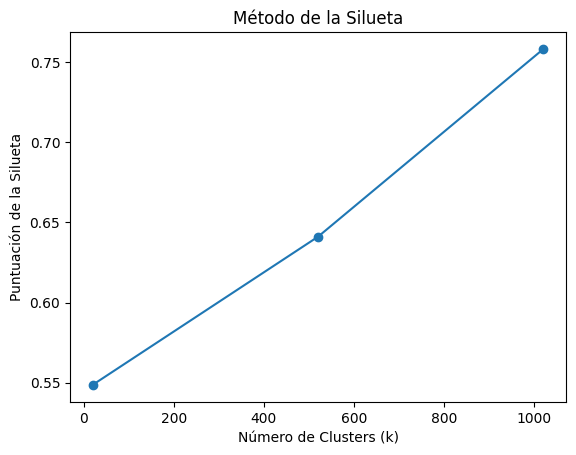

Número óptimo de clusters (k) según el método de la silueta: 1020


In [14]:
# Probar diferentes valores de k
k_values = range(20, 1500, 500)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(violadores)
    
    # Calcular la puntuación de la silueta para el número actual de clusters (k)
    silhouette_avg = silhouette_score(violadores, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de la Silueta')
plt.show()

# Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')

c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (915) found smaller than n_clusters (1000). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: N

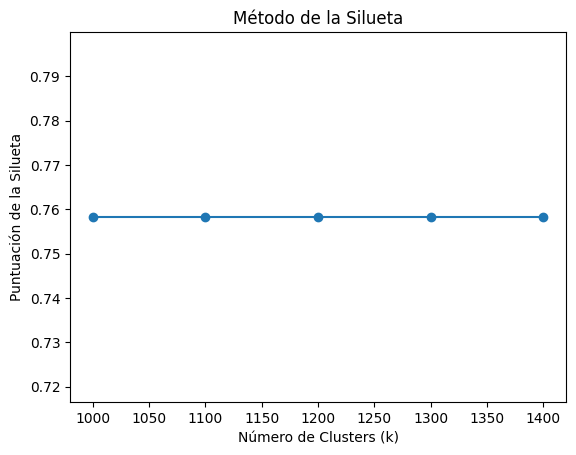

Número óptimo de clusters (k) según el método de la silueta: 1000


In [15]:
# Probar diferentes valores de k
k_values = range(1000, 1500, 100)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(violadores)
    
    # Calcular la puntuación de la silueta para el número actual de clusters (k)
    silhouette_avg = silhouette_score(violadores, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de la Silueta')
plt.show()

# Encontrar el número óptimo de clusters (k) según la puntuación de la silueta
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Número óptimo de clusters (k) según el método de la silueta: {optimal_k}')


In [16]:
optimal_k=915

In [17]:
import os
import json

# Definir la ruta del archivo JSON y la carpeta de destino
json_file = "../data/processed/best_k.json"

# Cargar el contenido actual del archivo JSON
with open(json_file, 'r') as archivo:
    datos_json = json.load(archivo)

# Añadir un nuevo valor al JSON
nuevo_valor = optimal_k
datos_json["rappist_best_k"] = nuevo_valor

# Guardar los datos actualizados en el mismo archivo JSON
with open(json_file, 'w') as archivo:
    json.dump(datos_json, archivo, indent=2)

print(f"Se añadió el nuevo valor '{nuevo_valor}' al archivo JSON en {json_file}.")


Se añadió el nuevo valor '915' al archivo JSON en ../data/processed/best_k.json.


In [18]:
model = KMeans(n_clusters = 915, random_state = 42)
model.fit(violadores)

c:\Users\luisf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=915, random_state=42)

In [19]:
cluster_train = model.predict(violadores)

# Add predicted Cluster into train set
violadores["Cluster"] = cluster_train

In [22]:
violadores.head()

,date_occ,time_occ,area_name,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc,Cluster
4,1577836800000000000,30,1,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4,151
17,1579478400000000000,400,1,19,0,0,8,0,1,16,34.0542,-118.2566,5,0,16,403
278,1578787200000000000,900,1,37,0,1,1,0,0,174,34.0458,-118.2430,3,0,218,252
621,1579996800000000000,135,1,25,0,2,2,0,1,306,34.0456,-118.2504,3,0,439,388
871,1580774400000000000,400,1,40,0,1,2,0,1,377,34.0467,-118.2520,4,1,573,267


In [20]:
import seaborn as sns

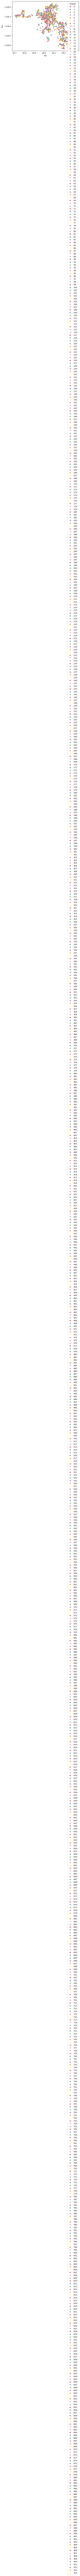

In [24]:
# Plot cluster's
figsize = (20,15)

sns.scatterplot(data = violadores, x = 'lat', y = 'lon', hue = 'Cluster', palette='Set1', legend = False)

plt.show()